# Codebook  
**Authors:** Lauren Baker   
Documenting existing data files of DaanMatch with information about location, owner, "version", source etc.

In [89]:
import boto3
import numpy as np 
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import statistics

In [90]:
client = boto3.client('s3')
resource = boto3.resource('s3')
my_bucket = resource.Bucket('daanmatchdatafiles')

# Goa proforma_panchayat.xlsx

## TOC:
* [About this dataset](#1)
* [Cleaned datasets](#2)
* [What's in this dataset](#3)
* [Codebook](#4)
    * [Missing values](#4.1)
    * [Summary statistics](#4.2)
* [Columns](#5)
    * [Sheet A](#5.1)
        * [Sr.No](#5.1.1)
        * [Name of the District along with State](#5.1.2)
        * [Name of Village Panchayat](#5.1.3)
        * [Name of Sarpanch](#5.1.4)
        * [Address with Pin Code](#5.1.5)
        * [Mobile No./Email Address](#5.1.6)
    * [Sheet B](#5.2)
        * [Sr.No](#5.2.1)
        * [Name of the District along with State](#5.2.2)
        * [Name of Gram Panchayat](#5.2.3)
        * [Gram Panchayat Bhawan Adress with Pin Code](#5.2.4)
    * [Sheet C](#5.3)
        * [Sr.No](#5.3.1)
        * [Name of the District along with State](#5.3.2)
        * [Name of Panchayat Officer (V.P. Secretary)](#5.3.3)
        * [Mobile No.](#5.3.4)
        * [Email Address](#5.3.5)

**About this dataset**  <a class="anchor" id="1"></a>  
Data provided by: Unknown.  
Source: https://daanmatchdatafiles.s3.us-west-1.amazonaws.com/Goa+proforma_panchayat.xlsx  
Type: xlsx  
Last Modified: June 14, 2021, 21:47:22 (UTC-07:00)  
Size: 50.8 KB

In [91]:
path = "s3://daanmatchdatafiles/Goa proforma_panchayat.xlsx"
goa_proforma = pd.ExcelFile(path)
print(goa_proforma.sheet_names)

['(A)', '(B)', '(C)', '(D)', '(E)', '(F)']


In [92]:
goa_proforma_A = goa_proforma.parse('(A)')
goa_proforma_A.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Sr.No,Name of the District along with State,Name of Village Panchayat,Name of Sarpanch,Address with Pin Code,Mobile No./Email Address
1,NaN,"North Goa, V.P. Dhargalim",Dhargalim,Shri. Murarri Waradkar (Administrator),"Mahakhajan, Dhargal, Pernem -Goa 403512",9823717910
2,NaN,"North Goa, V.P. Arambol",Arambol,Smt. Pranali P. Vaigankar,"H. No. 302/1, Khalchawada, Arambol, Pernem – G...",8007881645
3,NaN,"North Goa, V.P. Khajne-Amere-Poroscodem",Khajne-Amere-Porascadem,Smt. Jayshri Jairam Pirankar,"H.No.75, Naibag, Pernem, Goa 403512",8390895492
4,NaN,"North Goa, V.P. Parcem",Parcem,Shri. Rama Naik,"Chonsai, Parcem Pernem-Goa 403512",9823321192


In [93]:
goa_proforma_B = goa_proforma.parse('(B)')
goa_proforma_B.head()

,PROFORMA,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,(B),NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,Sr.No,Name of the District along with State,Name of Gram Panchayat,Gram Panchayat Bhawan Adress with Pin Code
4,1,"North Goa, Goa",Dhargalim,"Dhargalim, Pernem - Goa 403513"


In [94]:
goa_proforma_C = goa_proforma.parse('(C)')
goa_proforma_C.head()

,PROFORMA,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,(C),NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,Sr.No,Name of the District along with State,Name of Panchayat Officer (V.P. Secretary),Mobile No.,Email Address
4,1,"North Goa, Goa",Shri. Subodh Prabhu,9970451419,NaN


In [95]:
goa_proforma_D = goa_proforma.parse('(D)')
goa_proforma_D.head()

,PROFORMA,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,(D),NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,Sr.No,Name of the District along with State,Name of Block Panchayat President,Address with Pin Code,Mobile No. / Email Address
4,1,GOA,NaN,NaN,NaN


In [96]:
goa_proforma_E = goa_proforma.parse('(E)')
goa_proforma_E.head()

,(E),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,Sr.No,Name of District along with State,Name of Disctrict Panchayat President,Address with Pin Code,Mobile No. / Email Address
2,1,"North Goa, GOA",Smt.Ankita L Navelkar - Adhyaksha,"H.No 247, Lalbag, Vithalpur, P.O. Sanquelim, B...",9923446211
3,2,"North Goa, GOA",Shri. Vasudev L Korgaonkar - Upadhyaksha,"H.No 353, Khalap wado, Canca, Bardez - Goa",9850453006
4,3,"South Goa, GOA",Shri. Navnaath G. Naik - Adhyaksha,"H.No 164/1, Bhaati, Sanguem-Goa",9421240037


In [97]:
goa_proforma_F = goa_proforma.parse('(F)')
goa_proforma_F.head()

,PROFORMA,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,(F),NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,Sr.No,Name of the State,Name of the Nodal Officer / Designation,Mobile No. / Email Address,Postal Details
4,1,GOA,"Shri. Gurudas Pilarnekar, Director, Directorat...",9763554136 dir-panc.goa@nic.in,"3rd lift, 3rd floor, Junta House, Panaji - Goa"


**Cleaned datasets**  <a class="anchor" id="2"></a>  

Cleaning up the data in Sheet A:

In [98]:
goa_proforma_A.rename(columns = {'Unnamed: 0' : 'Sr.No', 
                                 'Unnamed: 1' : 'Name of the District along with State', 
                                 'Unnamed: 2' : 'Name of Village Panchayat', 
                                 'Unnamed: 3' : 'Name of Sarpanch', 
                                 'Unnamed: 4' : 'Address with Pin Code', 
                                 'Unnamed: 5' : 'Mobile No./Email Address'}, inplace = True)
goa_proforma_A = goa_proforma_A.iloc[1:, :]
goa_proforma_A = goa_proforma_A.reset_index(drop = True)
goa_proforma_A

,Sr.No,Name of the District along with State,Name of Village Panchayat,Name of Sarpanch,Address with Pin Code,Mobile No./Email Address
0,NaN,"North Goa, V.P. Dhargalim",Dhargalim,Shri. Murarri Waradkar (Administrator),"Mahakhajan, Dhargal, Pernem -Goa 403512",9823717910
1,NaN,"North Goa, V.P. Arambol",Arambol,Smt. Pranali P. Vaigankar,"H. No. 302/1, Khalchawada, Arambol, Pernem – G...",8007881645
2,NaN,"North Goa, V.P. Khajne-Amere-Poroscodem",Khajne-Amere-Porascadem,Smt. Jayshri Jairam Pirankar,"H.No.75, Naibag, Pernem, Goa 403512",8390895492
3,NaN,"North Goa, V.P. Parcem",Parcem,Shri. Rama Naik,"Chonsai, Parcem Pernem-Goa 403512",9823321192
4,NaN,"North Goa, V.P. Ibrampur - Hankahne",Ibrampur-Hankahne,Shri. Ashok Mahadev Dhauskar,"H.No. 89, Ibrampur-Pernem – Goa 403512",9421240482
...,...,...,...,...,...,...
182,NaN,South Goa,Majorda Utorda Calata,Mr.Moises A. Vaz,---,9922929636
183,NaN,South Goa,Chicalim,Mrs.Prajoti L. Kudaikar,---,9049843109
184,NaN,South Goa,Cansaulim-Arossim-Cuelim,"Mrs.FilomenaD,Mello",---,9545485086
185,NaN,South Goa,Velsao-Pale-Issorcim,Mr. Henrique D’Mello,---,9657896983


Cleaning up the data in Sheet B:

In [99]:
goa_proforma_B.rename(columns = {'PROFORMA' : 'Sr.No', 
                                 'Unnamed: 1' : 'Name of the District along with State', 
                                 'Unnamed: 2' : 'Name of Gram Panchayat', 
                                 'Unnamed: 3' : 'Gram Panchayat Bhawan Adress with Pin Code'}, inplace = True)
goa_proforma_B = goa_proforma_B.iloc[4:, :]
goa_proforma_B = goa_proforma_B.reset_index(drop = True)
goa_proforma_B

,Sr.No,Name of the District along with State,Name of Gram Panchayat,Gram Panchayat Bhawan Adress with Pin Code
0,1,"North Goa, Goa",Dhargalim,"Dhargalim, Pernem - Goa 403513"
1,2,"North Goa, Goa",Arambol,"Arambol, Pernem - Goa 403524"
2,3,"North Goa, Goa",Khajne-Amere-Porascadem,"Khajne-Amere-Porascadem, Pernem - Goa 403512"
3,4,"North Goa, Goa",Parcem,"Parcem, Pernem - Goa 403512"
4,5,"North Goa, Goa",Ibrampur-Hankahne,"Ibrampur-Hankahne, Pernem - Goa 403503"
...,...,...,...,...
182,183,"South Goa, Goa",Majorda Utorda Calata,"Majorda Utorda Calata, Mormugoa - Goa"
183,184,"South Goa, Goa",Chicalim,"Chicalim, Mormugoa - Goa"
184,185,"South Goa, Goa",Cansaulim-Arossim-Cuelim,"Cansaulim-Arossim-Cuelim, Mormugoa - Goa"
185,186,"South Goa, Goa",Velsao-Pale-Issorcim,"Velsao-Pale-Issorcim, Mormugoa - Goa"


Cleaning up the data in Sheet C:

In [100]:
goa_proforma_C.rename(columns = {'PROFORMA' : 'Sr.No', 
                                 'Unnamed: 1' : 'Name of the District along with State', 
                                 'Unnamed: 2' : 'Name of Panchayat Officer (V.P. Secretary)', 
                                 'Unnamed: 3' : 'Mobile No.', 
                                 'Unnamed: 4' : 'Email Address'}, inplace = True)
goa_proforma_C = goa_proforma_C.iloc[4:, :]
goa_proforma_C = goa_proforma_C.reset_index(drop = True)
goa_proforma_C

,Sr.No,Name of the District along with State,Name of Panchayat Officer (V.P. Secretary),Mobile No.,Email Address
0,1,"North Goa, Goa",Shri. Subodh Prabhu,9970451419,NaN
1,2,"North Goa, Goa",Shri. Dharmendra Govekar,9764364603,NaN
2,3,"North Goa, Goa",Shri. Rui Cardozo,9822282013,NaN
3,4,"North Goa, Goa",Shri. Rajesh Assolkar,9764007587,NaN
4,5,"North Goa, Goa",Shri. Amit Prabhu,9764512999,NaN
...,...,...,...,...,...
180,181,"South Goa, Goa",Shri Babuso M Tilve,9420107912,NaN
181,182,"South Goa, Goa",Smt. Gauri M. Velip,9421255686,NaN
182,183,"South Goa, Goa",Shri. Dinkar V. Kossambe,9423503452,NaN
183,184,"South Goa, Goa",Shri Gurudas Gaonkar,8554904684,NaN


Cleaning up the data in Sheet D:

In [101]:
goa_proforma_D

,PROFORMA,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,(D),NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,Sr.No,Name of the District along with State,Name of Block Panchayat President,Address with Pin Code,Mobile No. / Email Address
4,1,GOA,NaN,NaN,NaN


Sheet D contains no information, so we can ignore it and proceed with cleaning the other sheets.

Cleaning up the data in Sheet E:

In [102]:
goa_proforma_E.rename(columns = {'(E)' : 'Sr.No', 
                                 'Unnamed: 1' : 'Name of District along with State', 
                                 'Unnamed: 2' : 'Name of District Panchayat President', 
                                 'Unnamed: 3' : 'Address with Pin Code', 
                                 'Unnamed: 4' : 'Mobile No. / Email Address'}, inplace = True)
goa_proforma_E = goa_proforma_E.iloc[2:, :]
goa_proforma_E = goa_proforma_E.reset_index(drop = True)
goa_proforma_E

,Sr.No,Name of District along with State,Name of District Panchayat President,Address with Pin Code,Mobile No. / Email Address
0,1,"North Goa, GOA",Smt.Ankita L Navelkar - Adhyaksha,"H.No 247, Lalbag, Vithalpur, P.O. Sanquelim, B...",9923446211
1,2,"North Goa, GOA",Shri. Vasudev L Korgaonkar - Upadhyaksha,"H.No 353, Khalap wado, Canca, Bardez - Goa",9850453006
2,3,"South Goa, GOA",Shri. Navnaath G. Naik - Adhyaksha,"H.No 164/1, Bhaati, Sanguem-Goa",9421240037
3,4,"South Goa, GOA",Smt. Chitra Parab Fadte - Upadhyaksha,"H.No 73, Near Mal, Kharwada, Bandora, Ponda - Goa",9049666058


Cleaning up the data in Sheet F:

In [103]:
goa_proforma_F

,PROFORMA,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,(F),NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,Sr.No,Name of the State,Name of the Nodal Officer / Designation,Mobile No. / Email Address,Postal Details
4,1,GOA,"Shri. Gurudas Pilarnekar, Director, Directorat...",9763554136 dir-panc.goa@nic.in,"3rd lift, 3rd floor, Junta House, Panaji - Goa"


In [104]:
goa_proforma_F.rename(columns = {'PROFORMA' : 'Sr.No', 
                                 'Unnamed: 1' : 'Name of the State', 
                                 'Unnamed: 2' : 'Name of the Nodal Officer / Designation', 
                                 'Unnamed: 3' : 'Mobile No. / Email Address', 
                                 'Unnamed: 4' : 'Postal Details'}, inplace = True)
goa_proforma_F = goa_proforma_F.iloc[4:, :]
goa_proforma_F = goa_proforma_F.reset_index(drop = True)
goa_proforma_F

,Sr.No,Name of the State,Name of the Nodal Officer / Designation,Mobile No. / Email Address,Postal Details
0,1,GOA,"Shri. Gurudas Pilarnekar, Director, Directorat...",9763554136 dir-panc.goa@nic.in,"3rd lift, 3rd floor, Junta House, Panaji - Goa"


**What's in this dataset?** <a class="anchor" id="3"></a>

In [105]:
print("Sheet A:")
print("Shape:", goa_proforma_A.shape)
print("Rows:", goa_proforma_A.shape[0])
print("Columns:", goa_proforma_A.shape[1])
print("Each row is a Sarpanch in Goa.")

print('\n')
print("Sheet B:")
print("Shape:", goa_proforma_B.shape)
print("Rows:", goa_proforma_B.shape[0])
print("Columns:", goa_proforma_B.shape[1])
print("Each row is a Gram Panchayat in Goa.")

print('\n')
print("Sheet C:")
print("Shape:", goa_proforma_C.shape)
print("Rows:", goa_proforma_C.shape[0])
print("Columns:", goa_proforma_C.shape[1])
print("Each row is a Panchayat Officer in Goa.")

print('\n')
print("Sheet E:")
print("Shape:", goa_proforma_E.shape)
print("Rows:", goa_proforma_E.shape[0])
print("Columns:", goa_proforma_E.shape[1])
print("Each row is a Disctrict Panchayat President in Goa.")

print('\n')
print("Sheet F:")
print("Shape:", goa_proforma_F.shape)
print("Rows:", goa_proforma_F.shape[0])
print("Columns:", goa_proforma_F.shape[1])
print("Each row is a Nodal Officer in Goa.")

Sheet A:
Shape: (187, 6)
Rows: 187
Columns: 6
Each row is a Sarpanch in Goa.


Sheet B:
Shape: (187, 4)
Rows: 187
Columns: 4
Each row is a Gram Panchayat in Goa.


Sheet C:
Shape: (185, 5)
Rows: 185
Columns: 5
Each row is a Panchayat Officer in Goa.


Sheet E:
Shape: (4, 5)
Rows: 4
Columns: 5
Each row is a Disctrict Panchayat President in Goa.


Sheet F:
Shape: (1, 5)
Rows: 1
Columns: 5
Each row is a Nodal Officer in Goa.


**Codebook** <a class="anchor" id="4"></a>

In [106]:
print("Codebook for Sheet A:")
goa_proforma_A_columns = [column for column in goa_proforma_A.columns]
goa_proforma_A_description = ["Meant for counting, is a null column.", 
                              "Name of district in Goa.", 
                              "Name of the village panchayat the Sarpanch is elected in.", 
                              "Name of the Sarpanch (elected offical).", 
                              "The address and pin code of the Sarpanch.", 
                              "The mobile phone number or email address of the Sarpanch."]
goa_proforma_A_dtypes = [dtype for dtype in goa_proforma_A.dtypes]

data_A = {"Column Name": goa_proforma_A_columns, "Description": goa_proforma_A_description, "Type": goa_proforma_A_dtypes}
goa_proforma_A_codebook = pd.DataFrame(data_A)
goa_proforma_A_codebook.style.set_properties(subset=['Description'], **{'width': '600px'})

Codebook for Sheet A:


,Column Name,Description,Type
0,Sr.No,"Meant for counting, is a null column.",object
1,Name of the District along with State,Name of district in Goa.,object
2,Name of Village Panchayat,Name of the village panchayat the Sarpanch is elected in.,object
3,Name of Sarpanch,Name of the Sarpanch (elected offical).,object
4,Address with Pin Code,The address and pin code of the Sarpanch.,object
5,Mobile No./Email Address,The mobile phone number or email address of the Sarpanch.,object


In [107]:
print("Codebook for Sheet B:")
goa_proforma_B_columns = [column for column in goa_proforma_B.columns]
goa_proforma_B_description = ["Counts the number of Gram Panchayats.", 
                              "Name of district in Goa.", 
                              "Name of the Gram Panchayat (elected offical).", 
                              "The address and pin code of the Gram Panchayat."]
goa_proforma_B_dtypes = [dtype for dtype in goa_proforma_B.dtypes]

data_B = {"Column Name": goa_proforma_B_columns, "Description": goa_proforma_B_description, "Type": goa_proforma_B_dtypes}
goa_proforma_B_codebook = pd.DataFrame(data_B)
goa_proforma_B_codebook.style.set_properties(subset=['Description'], **{'width': '600px'})

Codebook for Sheet B:


,Column Name,Description,Type
0,Sr.No,Counts the number of Gram Panchayats.,object
1,Name of the District along with State,Name of district in Goa.,object
2,Name of Gram Panchayat,Name of the Gram Panchayat (elected offical).,object
3,Gram Panchayat Bhawan Adress with Pin Code,The address and pin code of the Gram Panchayat.,object


**Missing values** <a class="anchor" id="4.1"></a>

In [108]:
goa_proforma_A.isnull().sum()

Sr.No                                    187
Name of the District along with State      0
Name of Village Panchayat                  0
Name of Sarpanch                           0
Address with Pin Code                     19
Mobile No./Email Address                   1
dtype: int64

In [109]:
goa_proforma_B.isnull().sum()

Sr.No                                         0
Name of the District along with State         0
Name of Gram Panchayat                        0
Gram Panchayat Bhawan Adress with Pin Code    0
dtype: int64

In [110]:
goa_proforma_C.isnull().sum()

Sr.No                                           0
Name of the District along with State           0
Name of Panchayat Officer (V.P. Secretary)      0
Mobile No.                                      0
Email Address                                 182
dtype: int64

In [111]:
goa_proforma_E.isnull().sum()

Sr.No                                   0
Name of District along with State       0
Name of District Panchayat President    0
Address with Pin Code                   0
Mobile No. / Email Address              0
dtype: int64

In [112]:
goa_proforma_F.isnull().sum()

Sr.No                                      0
Name of the State                          0
Name of the Nodal Officer / Designation    0
Mobile No. / Email Address                 0
Postal Details                             0
dtype: int64

**Summary statistics** <a class="anchor" id="4.2"></a>

In [113]:
goa_proforma_A.describe()

,Sr.No,Name of the District along with State,Name of Village Panchayat,Name of Sarpanch,Address with Pin Code,Mobile No./Email Address
count,0,187,187,187,168,186
unique,0,130,185,187,149,186
top,NaN,South Goa,Querim,Smt. Vishranti Rajkumar Dessai,---,9423224690
freq,NaN,58,2,1,20,1


In [114]:
goa_proforma_B.describe()

,Sr.No,Name of the District along with State,Name of Gram Panchayat,Gram Panchayat Bhawan Adress with Pin Code
count,187,187,187,187
unique,187,2,185,187
top,1,"North Goa, Goa",Querim,"Rumdamol-Davorlim, Salcete - Goa"
freq,1,102,2,1


In [115]:
goa_proforma_C.describe()

,Sr.No,Name of the District along with State,Name of Panchayat Officer (V.P. Secretary),Mobile No.,Email Address
count,185,185,185,185,3
unique,185,2,175,171,3
top,1,"North Goa, Goa",Shri. Advin Carvalho,---,joslynesteves@gmail.com
freq,1,103,2,3,1


In [116]:
goa_proforma_E.describe()

,Sr.No,Name of District along with State,Name of District Panchayat President,Address with Pin Code,Mobile No. / Email Address
count,4,4,4,4,4
unique,4,2,4,4,4
top,1,"South Goa, GOA",Shri. Navnaath G. Naik - Adhyaksha,"H.No 353, Khalap wado, Canca, Bardez - Goa",9049666058
freq,1,2,1,1,1


In [117]:
goa_proforma_F.describe()

,Sr.No,Name of the State,Name of the Nodal Officer / Designation,Mobile No. / Email Address,Postal Details
count,1,1,1,1,1
unique,1,1,1,1,1
top,1,GOA,"Shri. Gurudas Pilarnekar, Director, Directorat...",9763554136 dir-panc.goa@nic.in,"3rd lift, 3rd floor, Junta House, Panaji - Goa"
freq,1,1,1,1,1


## Columns
<a class="anchor" id="5"></a>

### Sheet A
<a class="anchor" id="5.1"></a>
Sheet A contains information about Sarpanchs in Goa.

### Sr.No.
<a class="anchor" id="5.1.1"></a>
Meant for counting, is a null column.

In [118]:
column = goa_proforma_A["Sr.No"]
column

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
182    NaN
183    NaN
184    NaN
185    NaN
186    NaN
Name: Sr.No, Length: 187, dtype: object

In [119]:
print("No. of unique values:", len(column.unique()))
counter = dict(Counter(column))
duplicates = {key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

print("No. of null values:", sum(column.isnull()))

No. of unique values: 1
Duplicates: {nan: 187}
No. of duplicates: 1
No. of null values: 187


### Name of the District along with State
<a class="anchor" id="5.1.2"></a>
Name of district in Goa.

In [120]:
column = goa_proforma_A["Name of the District along with State"]
column

0                    North Goa, V.P. Dhargalim
1                      North Goa, V.P. Arambol
2      North Goa, V.P. Khajne-Amere-Poroscodem
3                       North Goa, V.P. Parcem
4          North Goa, V.P. Ibrampur - Hankahne
                        ...                   
182                                  South Goa
183                                  South Goa
184                                  South Goa
185                                  South Goa
186                                  South Goa
Name: Name of the District along with State, Length: 187, dtype: object

In [121]:
print("No. of unique values:", len(column.unique()))
counter = dict(Counter(column))
duplicates = {key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

print("No. of null values:", sum(column.isnull()))

No. of unique values: 130
Duplicates: {'South Goa': 58}
No. of duplicates: 1
No. of null values: 0


The first 128 values all consist of either "North Goa" or "South Goa", followed by "V.P." and a name of a Village Panchayat. This VP is repeated in the next column, so we can remove it to see how many counts we have in each district.

In [122]:
districts = column.apply(lambda x: str(x[:9]))
districts

0      North Goa
1      North Goa
2      North Goa
3      North Goa
4      North Goa
         ...    
182    South Goa
183    South Goa
184    South Goa
185    South Goa
186    South Goa
Name: Name of the District along with State, Length: 187, dtype: object

In [123]:
print("Unique values:", districts.unique())
print("No. of unique values:", len(districts.unique()))

# Table of number of Sarpanchs in each district
table = districts.value_counts().rename_axis('District').reset_index(name='Count')
table

Unique values: ['North Goa' 'South Goa']
No. of unique values: 2


,District,Count
0,North Goa,102
1,South Goa,85


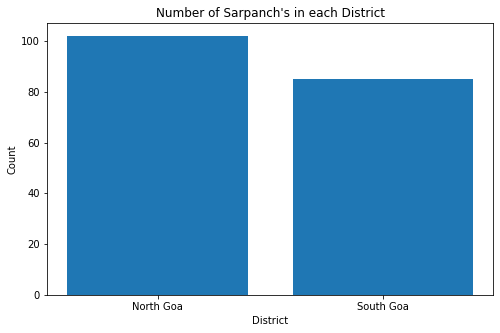

In [139]:
plt.figure(figsize = (8, 5))
plt.bar(table["District"], table["Count"])
plt.title("Number of Sarpanch's in each District")
plt.xlabel("District")
plt.ylabel("Count")
plt.show()

### Name of Village Panchayat
<a class="anchor" id="5.1.3"></a>
Name of the village panchayat the Sarpanch is elected in.

In [125]:
column = goa_proforma_A["Name of Village Panchayat"]
column

0                     Dhargalim
1                       Arambol
2       Khajne-Amere-Porascadem
3                        Parcem
4             Ibrampur-Hankahne
                 ...           
182       Majorda Utorda Calata
183                    Chicalim
184    Cansaulim-Arossim-Cuelim
185        Velsao-Pale-Issorcim
186                    Sancoale
Name: Name of Village Panchayat, Length: 187, dtype: object

In [126]:
print("No. of unique values:", len(column.unique()))
counter = dict(Counter(column))
duplicates = {key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

print("No. of null values:", sum(column.isnull()))

No. of unique values: 185
Duplicates: {'Querim': 2, 'Navelim': 2}
No. of duplicates: 2
No. of null values: 0


### Name of Sarpanch
<a class="anchor" id="5.1.4"></a>
Name of the Sarpanch (elected offical).

In [127]:
column = goa_proforma_A["Name of Sarpanch"]
column

0      Shri.  Murarri Waradkar (Administrator)
1                    Smt. Pranali P. Vaigankar
2                 Smt. Jayshri Jairam Pirankar
3                              Shri. Rama Naik
4                 Shri. Ashok Mahadev Dhauskar
                        ...                   
182                           Mr.Moises A. Vaz
183                    Mrs.Prajoti L. Kudaikar
184                        Mrs.FilomenaD,Mello
185                       Mr. Henrique D’Mello
186                 Mr.Ramakant Narayan Borkar
Name: Name of Sarpanch, Length: 187, dtype: object

In [128]:
print("No. of unique values:", len(column.unique()))
counter = dict(Counter(column))
duplicates = {key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

print("No. of null values:", sum(column.isnull()))

No. of unique values: 187
Duplicates: {}
No. of null values: 0


In [129]:
#Titles of officers
titles = column.apply(lambda x: str(x[:3]))
smt = 0; shr = 0; mr = 0; mrs = 0; none = 0
for title in titles:
    if (title == 'Smt'):
        smt += 1
    elif (title == 'Shr'):
        shr += 1
    elif (title == 'Mrs'):
        mrs += 1
    elif (title == 'Mr.'):
        mr += 1
    else:
        none += 1
titles_df = pd.DataFrame(data = {'Titles' : ['Smt.', 'Shri.', 'Mr.', 'Mrs.', 'None'], 
                                 'Counts' : [smt, shr, mr, mrs, none]})
titles_df

,Titles,Counts
0,Smt.,34
1,Shri.,48
2,Mr.,8
3,Mrs.,4
4,None,93


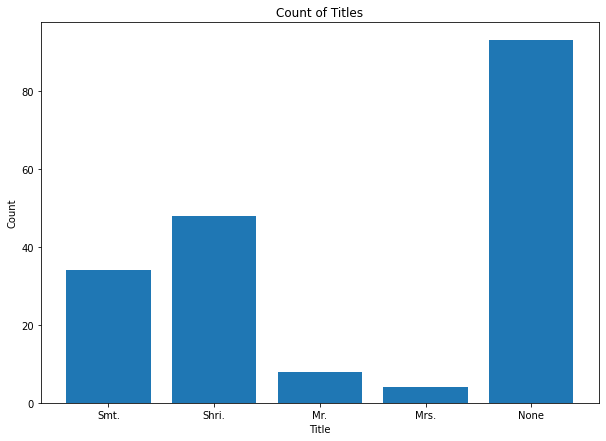

In [130]:
# Plot number of titles'
plt.figure(figsize = (10, 7))
plt.bar(titles_df["Titles"], titles_df["Counts"])
plt.title("Count of Titles")
plt.xlabel("Title")
plt.ylabel('Count')
plt.show()

### Address with Pin Code
<a class="anchor" id="5.1.5"></a>
The address and pin code of the Sarpanch.

In [131]:
column = goa_proforma_A["Address with Pin Code"]
column

0                Mahakhajan, Dhargal, Pernem -Goa 403512
1      H. No. 302/1, Khalchawada, Arambol, Pernem – G...
2                    H.No.75, Naibag, Pernem, Goa 403512
3                      Chonsai, Parcem Pernem-Goa 403512
4                 H.No. 89, Ibrampur-Pernem – Goa 403512
                             ...                        
182                                                  ---
183                                                  ---
184                                                  ---
185                                                  ---
186                                                  ---
Name: Address with Pin Code, Length: 187, dtype: object

In [132]:
print("No. of unique values:", len(column.unique()))
counter = dict(Counter(column))
duplicates = {key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

print("No. of null values:", sum(column.isnull()))

No. of unique values: 150
Duplicates: {nan: 19, ' ---': 20}
No. of duplicates: 2
No. of null values: 19


### Mobile No./Email Address
<a class="anchor" id="5.1.6"></a>
The mobile phone number or email address of the Sarpanch.

In [133]:
column = goa_proforma_A["Mobile No./Email Address"]
column

0      9823717910
1      8007881645
2      8390895492
3      9823321192
4      9421240482
          ...    
182    9922929636
183    9049843109
184    9545485086
185    9657896983
186    9860187445
Name: Mobile No./Email Address, Length: 187, dtype: object

In [134]:
print("No. of unique values:", len(column.unique()))
counter = dict(Counter(column))
duplicates = {key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

print("No. of null values:", sum(column.isnull()))

No. of unique values: 187
Duplicates: {}
No. of null values: 1


### Sheet B
<a class="anchor" id="5.2"></a>
Sheet B contains information about Gram Panchayats in Goa.

### Sr.No.
<a class="anchor" id="5.2.1"></a>
Counts the number of Gram Panchayats.

In [135]:
column = goa_proforma_B["Sr.No"]
column

0        1
1        2
2        3
3        4
4        5
      ... 
182    183
183    184
184    185
185    186
186    187
Name: Sr.No, Length: 187, dtype: object

In [136]:
print("No. of unique values:", len(column.unique()))
counter = dict(Counter(column))
duplicates = {key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

print("No. of null values:", sum(column.isnull()))

No. of unique values: 187
Duplicates: {}
No. of null values: 0


### Name of the District along with State
<a class="anchor" id="5.2.2"></a>
Name of district in Goa.

In [137]:
column = goa_proforma_B["Name of the District along with State"]
column

0      North Goa, Goa
1      North Goa, Goa
2      North Goa, Goa
3      North Goa, Goa
4      North Goa, Goa
            ...      
182    South Goa, Goa
183    South Goa, Goa
184    South Goa, Goa
185    South Goa, Goa
186    South Goa, Goa
Name: Name of the District along with State, Length: 187, dtype: object

In [140]:
print("No. of unique values:", len(column.unique()))
counter = dict(Counter(column))
duplicates = {key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

print("No. of null values:", sum(column.isnull()))

No. of unique values: 2
Duplicates: {'North Goa, Goa': 102, 'South Goa, Goa': 85}
No. of duplicates: 2
No. of null values: 0


In [141]:
districts = column.apply(lambda x: str(x[:9]))

print("Unique values:", districts.unique())
print("No. of unique values:", len(districts.unique()))

# Table of number of Sarpanchs in each district
table = districts.value_counts().rename_axis('District').reset_index(name='Count')
table

Unique values: ['North Goa' 'South Goa']
No. of unique values: 2


,District,Count
0,North Goa,102
1,South Goa,85


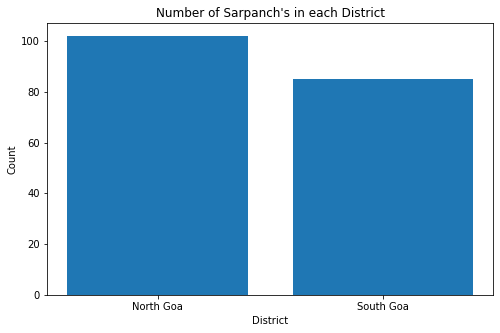

In [142]:
plt.figure(figsize = (8, 5))
plt.bar(table["District"], table["Count"])
plt.title("Number of Sarpanch's in each District")
plt.xlabel("District")
plt.ylabel("Count")
plt.show()

### Name of Gram Panchayat
<a class="anchor" id="5.2.3"></a>
Name of the Gram Panchayat (elected offical).

In [143]:
column = goa_proforma_B["Name of Gram Panchayat"]
column

0                     Dhargalim
1                       Arambol
2       Khajne-Amere-Porascadem
3                        Parcem
4             Ibrampur-Hankahne
                 ...           
182       Majorda Utorda Calata
183                    Chicalim
184    Cansaulim-Arossim-Cuelim
185        Velsao-Pale-Issorcim
186                    Sancoale
Name: Name of Gram Panchayat, Length: 187, dtype: object

In [144]:
print("No. of unique values:", len(column.unique()))
counter = dict(Counter(column))
duplicates = {key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

print("No. of null values:", sum(column.isnull()))

No. of unique values: 185
Duplicates: {'Querim': 2, 'Navelim': 2}
No. of duplicates: 2
No. of null values: 0


In [146]:
goa_proforma_B[goa_proforma_B["Name of Gram Panchayat"].isin(duplicates)].sort_values('Name of Gram Panchayat')

,Sr.No,Name of the District along with State,Name of Gram Panchayat,Gram Panchayat Bhawan Adress with Pin Code
93,94,"North Goa, Goa",Navelim,"Navelim, Bicholim - Goa"
129,130,"South Goa, Goa",Navelim,"Navelim, Salcete - Goa"
81,82,"North Goa, Goa",Querim,"Querim,Sattari - Goa"
113,114,"South Goa, Goa",Querim,"Querim, Ponda - Goa"


Duplicates in ```Name of Gram Panchayat``` are duplicates in rows.

### Gram Panchayat Bhawan Adress with Pin Code
<a class="anchor" id="5.2.4"></a>
The address and pin code of the Gram Panchayat.

In [147]:
column = goa_proforma_B["Gram Panchayat Bhawan Adress with Pin Code"]
column

0                    Dhargalim, Pernem - Goa 403513
1                      Arambol, Pernem - Goa 403524
2      Khajne-Amere-Porascadem, Pernem - Goa 403512
3                       Parcem, Pernem - Goa 403512
4            Ibrampur-Hankahne, Pernem - Goa 403503
                           ...                     
182           Majorda Utorda Calata, Mormugoa - Goa
183                        Chicalim, Mormugoa - Goa
184        Cansaulim-Arossim-Cuelim, Mormugoa - Goa
185            Velsao-Pale-Issorcim, Mormugoa - Goa
186                         Sancoale,Mormugoa - Goa
Name: Gram Panchayat Bhawan Adress with Pin Code, Length: 187, dtype: object

In [148]:
print("No. of unique values:", len(column.unique()))
counter = dict(Counter(column))
duplicates = {key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

print("No. of null values:", sum(column.isnull()))

No. of unique values: 187
Duplicates: {}
No. of null values: 0


### Sheet C
<a class="anchor" id="5.3"></a>
Sheet C contains information about Panchayat Officers in Goa.